# 선거 개입 관련 문제

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
data = pd.read_csv("../input/data.csv", encoding="cp949")

In [3]:
del data["정의당"]
data

,투표_지역구id,선거종류명,지역명,선거구_시도명,읍면동명,투표구명,선거인수,투표수,더불어민주당,미래통합당
0,1,제21대 국회의원선거,서울특별시,종로구,거소·선상투표,거소·선상투표,251,237,135,81.0
1,2,제21대 국회의원선거,서울특별시,종로구,관외사전투표,관외사전투표,10007,9994,6472,3169.0
2,3,제21대 국회의원선거,서울특별시,종로구,국외부재자투표,국외부재자투표,1177,321,232,80.0
3,4,제21대 국회의원선거,서울특별시,종로구,국외부재자투표(공관),국외부재자투표(공관),0,12,11,1.0
4,5,제21대 국회의원선거,서울특별시,종로구,청운효자동,관내사전투표,3185,3184,2253,878.0
5,6,제21대 국회의원선거,서울특별시,종로구,청운효자동,청운효자동제1투,2253,1261,586,634.0
6,7,제21대 국회의원선거,서울특별시,종로구,청운효자동,청운효자동제2투,2077,1220,576,606.0
7,8,제21대 국회의원선거,서울특별시,종로구,청운효자동,청운효자동제3투,2146,1348,736,572.0
8,9,제21대 국회의원선거,서울특별시,종로구,사직동,관내사전투표,2549,2549,1502,1007.0
9,10,제21대 국회의원선거,서울특별시,종로구,사직동,사직동제1투,2169,1064,485,536.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 10 columns):
투표_지역구id    9069 non-null int64
선거종류명       9069 non-null object
지역명         9069 non-null object
선거구_시도명     9069 non-null object
읍면동명        9069 non-null object
투표구명        9069 non-null object
선거인수        9069 non-null int64
투표수         9069 non-null int64
더불어민주당      9069 non-null int64
미래통합당       6153 non-null float64
dtypes: float64(1), int64(4), object(5)
memory usage: 708.6+ KB


# 1. 벤포트 법칙을 해당 데이터에 적용할 시
http://www.hani.co.kr/arti/science/science_general/887957.html <br>
벤포트 법칙 : 각 숫자의 비율이 많이 벗어나 있으면 조작을 의심해볼 수 있다.

Text(0.5, 1.0, 'Benford law')

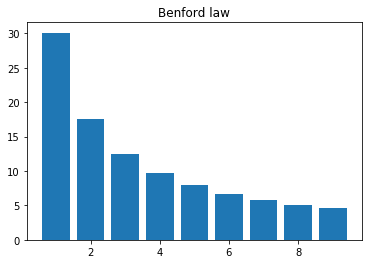

In [43]:
index = [1,2,3,4,5,6,7,8,9]
Benford = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]
df0 = pd.DataFrame([index, Benford]).T
df0.columns = ['index','Benford']
df0
plt.bar(df0['index'], df0['Benford'])
plt.title('Benford law')

(array([4.185e+03, 1.587e+03, 2.600e+02, 5.800e+01, 2.800e+01, 1.600e+01,
        8.000e+00, 9.000e+00, 2.000e+00]),
 array([   0.        ,  756.22222222, 1512.44444444, 2268.66666667,
        3024.88888889, 3781.11111111, 4537.33333333, 5293.55555556,
        6049.77777778, 6806.        ]),
 <a list of 9 Patch objects>)

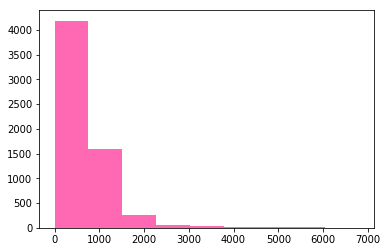

In [8]:
plt.hist(data["미래통합당"], color='hotpink', bins=9)

(array([7.97e+03, 7.03e+02, 2.57e+02, 6.40e+01, 3.00e+01, 1.50e+01,
        1.90e+01, 8.00e+00, 3.00e+00]),
 array([    0.        ,  1200.33333333,  2400.66666667,  3601.        ,
         4801.33333333,  6001.66666667,  7202.        ,  8402.33333333,
         9602.66666667, 10803.        ]),
 <a list of 9 Patch objects>)

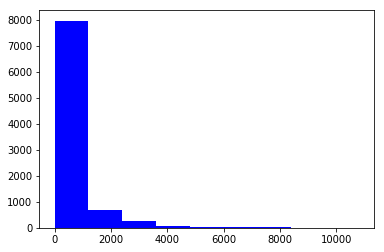

In [9]:
plt.hist(data["더불어민주당"], color='blue', bins=9)

> 벤포트 법칙을 따르지 않음.

# 2. 머신러닝 LOF를 사용한 이상치(이상한 표) 분류

In [115]:
df = data.loc[:,"선거인수":"미래통합당"]
df = df.fillna(0)
df.head()

,선거인수,투표수,더불어민주당,미래통합당
0,251,237,135,81.0
1,10007,9994,6472,3169.0
2,1177,321,232,80.0
3,0,12,11,1.0
4,3185,3184,2253,878.0


In [116]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(df).transform(df)
X[0:5]

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


array([[-1.14402078, -0.77671309, -0.78810233, -0.60032913],
       [ 4.60582   ,  5.90186983,  6.78158934,  4.67305663],
       [-0.59826918, -0.71921581, -0.67223361, -0.60203683],
       [-1.29195129, -0.93072366, -0.93622317, -0.73694534],
       [ 0.58517488,  1.24048317,  1.74189719,  0.76070988]])

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

In [118]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=2)
clf = clf.fit(X_train)
y_pred = clf.fit_predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [119]:
pd.Series(y_pred).value_counts()

 1    1632
-1     182
dtype: int64

In [120]:
182/(1632+182)

0.10033076074972437

> 전체 표에서 약 10%의 정도의 조작 표가 있었다고 나타나고 있음.